# Welcome to the ~~Dark~~ Data Side!

![](https://i.pinimg.com/originals/84/da/da/84dada0a5dcfd790700df3dd87897aef.gif)

### Overview:

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

### Data Dictionary

| Column | Descritpion     |
| :----| :----|
|RespondentID | An anonymized ID for the respondent (person taking the survey)|
|Gender| The respondent's gender|
|Age | The respondent's age|
|Household Income | The respondent's income|
|Education | The respondent's education level |
|Location (Census Region) | The respondent's location |
|Have you seen any of the 6 films in the Star Wars franchise? |Has a Yes or No response |
|Do you consider yourself to be a fan of the Star Wars film franchise? | Has a Yes or No response|

Answers to questions about the Star Wars movies are given in several other columns. The respondent had to check one or more boxes for some questions. These types of data are difficult to represent in a column. Therefore, this dataset requires much cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

pd.set_option('display.max_columns', 38)
pd.set_option('max_colwidth', 150)
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
star_wars = pd.read_csv('D:/StarWars.csv')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,"3,292,879,998.000",Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,"3,292,879,538.000",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,"3,292,765,271.000",Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,"3,292,763,116.000",Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,"3,292,731,220.000",Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes

In [3]:
# data exploration
star_wars.describe(include = 'all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,"1,186.000",1187,837,674,572,551,608,759,739,836,837,836,837,837,837,830,832,832,824,826,815,827,821,813,828,831,822,815,827,829,829,214,1069,1047,1047,859,1037,1044
unique,NaN,3,3,1,1,1,1,1,1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,4,3,3,3,3,5,6,6,10
top,NaN,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,5,6,1,1,2,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,936,552,674,572,551,608,759,739,237,300,217,204,289,232,610,552,547,269,591,213,310,236,248,474,562,204,207,605,325,615,114,641,549,291,298,328,181
mean,"3,290,128,200.533",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"1,055,638.908",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,"3,288,372,923.000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"3,289,450,962.750",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"3,290,147,175.500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"3,290,814,462.500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some issues related to data cleaning:
* many columns do not have a discriptive namings
* some columns have only one unique value (i.e. `Unnamed: 4` : `Unnamed: 8`)
* values of some columns represented as string, but in fact, they are of type int (i.e. `Unnamed: 10` : `Unnamed: 14`)
* binary columns are not represented in boolean format (instead `Yes`/`No`)

### Renaming Columns 

It looks like the row with index 0 is not an entry at all, but a subtitle for the columns. This data is going to come in handy for future analysis, so let's save it and then rename columns.

In [4]:
#save the 1st row for later 
aux_col_names = pd.DataFrame(columns = ['subtitle'])
aux_col_names['subtitle'] = star_wars.iloc[0, :]

#drop the 1st row
star_wars = star_wars.iloc[1:, :]

aux_col_names = aux_col_names.transpose()
aux_col_names

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
subtitle,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


In [5]:
star_wars = star_wars.rename(columns={
    'Have you seen any of the 6 films in the Star Wars franchise?': 'seen_any',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'sw_fan',
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_ep1',
    'Unnamed: 4' : 'seen_ep2',
    'Unnamed: 5' : 'seen_ep3',
    'Unnamed: 6' : 'seen_ep4',
    'Unnamed: 7' : 'seen_ep5',
    'Unnamed: 8' : 'seen_ep6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_ep1',
    'Unnamed: 10': 'ranking_ep2',
    'Unnamed: 11': 'ranking_ep3',
    'Unnamed: 12': 'ranking_ep4',
    'Unnamed: 13': 'ranking_ep5',
    'Unnamed: 14': 'ranking_ep6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda',
    'Which character shot first?': 'shot_first',
    'Are you familiar with the Expanded Universe?': 'know_eu',
    'Do you consider yourself to be a fan of the Expanded Universe?��': 'eu_fan',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'st_fan'
})

star_wars.head(5)

,RespondentID,seen_any,sw_fan,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,shot_first,know_eu,eu_fan,st_fan,Gender,Age,Household Income,Education,Location (Census Region)
1,"3,292,879,998.000",Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,"3,292,879,538.000",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,"3,292,765,271.000",Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,"3,292,763,116.000",Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,"3,292,731,220.000",Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning and Mapping Yes/No Columns

Take a look at the next two columns:

* `seen_any`

* `sw_fan`

<!-- 
* `know_eu`

* `eu_fan`

* `st_fan` -->

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question.

These columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

In [6]:
yes_no = { 'Yes': True, 'No': False}
yes_no_cols = ['seen_any', 'sw_fan']
# 'know_eu', 'eu_fan', 'st_fan'
for col in yes_no_cols:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars[yes_no_cols]

,seen_any,sw_fan
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True
...,...,...
1182,True,True
1183,True,True
1184,False,NaN
1185,True,True


In [7]:
for col in yes_no_cols:
    print(star_wars[col].value_counts(dropna = False))

True     936
False    250
Name: seen_any, dtype: int64
True     552
NaN      350
False    284
Name: sw_fan, dtype: int64


### Cleaning and Mapping Checkbox Columns

Columns `seen_ep1` : `seen_ep6` indicate whether the respondent saw the movie. If the name of the film appears in the list, the participant has seen the episode. If the name of the film appears in the list, the participant has seen the film. We are going to convert these columns to Boolean type as well. The values with the name of the movie will be converted to `True`, and the null values will be converted to `False`.

In [8]:
#convert 'seen_ep?' columns to boolean
star_wars.loc[:,'seen_ep1':'seen_ep6'] = star_wars.loc[:,'seen_ep1':'seen_ep6'].notnull()
star_wars.loc[:,'seen_ep1':'seen_ep6'].head()

,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


### Cleaning the Ranking Columns

The next six columns to work with ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

* `ranking_ep1` - How much the respondent liked Star Wars: `Episode I The Phantom Menace`


* `ranking_ep2` — How much the respondent liked `Star Wars: 
Episode II Attack of the Clones`


* `ranking_ep3` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`


* `ranking_ep4` — How much the respondent liked `Star Wars: Episode IV A New Hope`


* `ranking_ep5` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`


* `ranking_ep6` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

In [9]:
star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].astype(float)
star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].apply(lambda x: 7 - x)
star_wars.iloc[:, 9:15]

,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
1,4.000,5.000,6.000,3.000,2.000,1.000
2,NaN,NaN,NaN,NaN,NaN,NaN
3,6.000,5.000,4.000,3.000,2.000,1.000
4,2.000,1.000,6.000,5.000,3.000,4.000
5,2.000,3.000,1.000,5.000,6.000,4.000
...,...,...,...,...,...,...
1182,2.000,3.000,1.000,4.000,5.000,6.000
1183,3.000,2.000,1.000,5.000,4.000,6.000
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,3.000,4.000,1.000,2.000,5.000,6.000


As we can see, the logic of the ranking has changed. Now 6 is the highest or most favorite, while 1 is least. 

<!-- ### Cleaning and Mapping Character Columns

The main columns for the Star Wars characters are the answers to the question "Please indicate whether you have a favorable or unfavorable opinion of the following character, or whether you do not know him/her".

In order to make calculations, we will convert the ranking system to numbers:

* `Very favorably` - for each rating the character will receive 2 points

* `Somewhat favorably` - for each rating the character will receive 1 point

* `Neither favorably nor unfavorably (neutral)` - 0 points

* `Somewhat unfavorably` - for each rating the character will be deducted 1 point

* `Very unfavorably` - for each rating the character will be deducted 2 points

* `Unfamiliar (N/A)` - 0 points

points = {
    'Very favorably': 2,
    'Somewhat favorably': 1,
    'Neither favorably nor unfavorably (neutral)': 0,
    'Somewhat unfavorably': -1,
    'Very unfavorably': -2,
    'Unfamiliar (N/A)': 0,
    }

for col in star_wars.loc[:, 'Han Solo' : 'Yoda']:
    star_wars[col] = star_wars[col].map(points)
    
star_wars.loc[:, 'Han Solo' : 'Yoda'].head() -->

# Analysis, part I.  Best ranked and most seen

First, we will discover the best ranked movie.

In [10]:
#complete movies´ titles, to be used for plot labeling
titles = [

'The Phantom Menace',
'Attack of the Clones',
'Revenge of the Sith',
'A New Hope',
'The Empire Strikes Back',
'Return of the Jedi'
] 

#columns which refer to if a movie was seen by a respondent
seen_cols = ['seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6']

#the columns which refer to movie rankings
rank_cols = ['ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4', 'ranking_ep5', 'ranking_ep6']

rank = star_wars.iloc[:, 9:15].mean()
t_seen = star_wars.iloc[:, 3:9].sum()


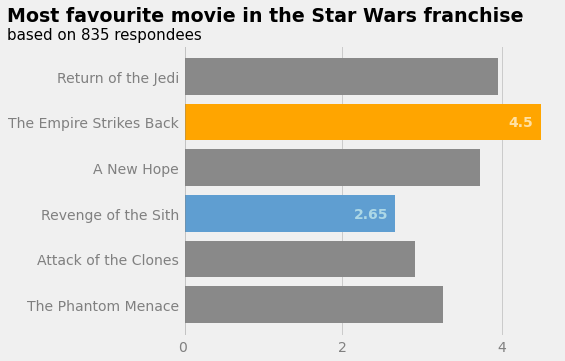

In [11]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (6, 5))

colors = ["orange" if i > 4 else ('#5f9ed1' if i < 2.7  else "#898989") for i in rank]

ax.barh(range(6), rank, color = colors)
ax.axvline(x = 0.0234, ymin = 0, ymax = 1,
           color = 'grey', alpha = 0.4, linewidth = 1)

ax.grid(visible = False) #remove grid
ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_yticklabels(titles) 
ax.xaxis.grid()

ax.set_xticks([0, 2, 4])
ax.set_xticklabels(['0','2','4']) 

ax.tick_params(colors='grey')

ax.text(4.08, 3.9,  weight = 'bold', color = '#FFE1A4',
        s = '4.5')
ax.text(2.14, 1.9,  weight = 'bold', color = 'lightblue',
        s = '2.65')
ax.text(-2.2, 6.2,  weight = 'bold', size = 19, color = 'black',
        s = 'Most favourite movie in the Star Wars franchise')
ax.text(-2.2, 5.8, size = 15, color = 'black',
        s = 'based on 835 respondees')
plt.show()

It seems that `Star Wars: Episode V The Empire Strikes Back` has the highest rating compared to other 5 movies from Star Wars franchise, while `Star Wars: Episode III Revenge of the Sith` is the least favorite. As we suspected, it looks like the "original" movies are rated much more highly than the newer ones.

The main question of the analysis: **“The Empire Strikes Back” is clearly the best of the bunch?**  
- Yes, it is.

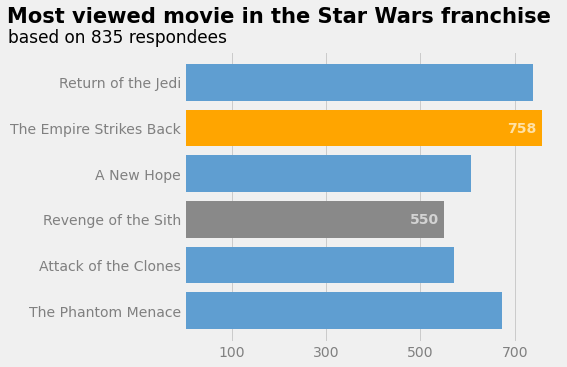

In [12]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (6, 5))

colors = ["orange" if i > 740 else ('#898989' if i < 560 else "#5f9ed1") for i in t_seen]

ax.barh(range(6), t_seen, color = colors)

ax.axvline(x = 0.0184, ymin = 0, ymax = 1,
           color = 'grey', alpha = 0.4, linewidth = 1)

ax.grid(visible = False) #remove grid
ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_yticklabels(titles) 
ax.xaxis.grid()

ax.set_xticks([ 100,  300, 500, 700])
ax.set_xticklabels(['100','300','500', '700']) 

ax.tick_params(colors='grey')


ax.text(683, 3.9,  weight = 'bold', color = '#FFE1A4',
        s = '758')
ax.text(478, 1.9,  weight = 'bold', color = 'lightgrey',
        s = '550')

ax.text(-375, 6.3,  weight = 'bold', size = 21, color = 'black',
        s = 'Most viewed movie in the Star Wars franchise')
ax.text(-373, 5.87, size = 17, color = 'black',
        s = 'based on 835 respondees')
plt.show()

Among the respondents, it is interesting to note that the least liked movie (`Star Wars: Episode III Revenge of the Sith`) was viewed the least, while the highest rated movie (`Star Wars: Episode V The Empire Strikes Back`) was viewed the most, although the number of views does not differ much. 

It seems that more of those surveyed saw the original than saw the newer movies. This confirms what we saw in the ratings, where the earlier films appear more popular.

## Male/female differences in favorite Star Wars movie and most-seen movie

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. 

In [13]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

Now, let's compute the most viewed movie, the highest-ranked movie for each gender separately.

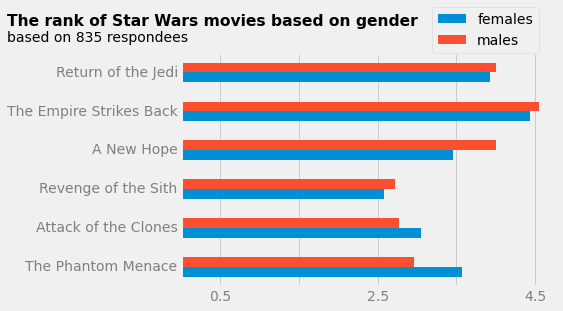

In [14]:
high_rank = pd.DataFrame()


high_rank['females'] = females.iloc[:, 9:15].mean()
high_rank['males'] = males.iloc[:, 9:15].mean()


high_rank.plot.barh()

plt.yticks([])
plt.xticks([0.5,1.5,2.5,3.5,4.5], ['0.5','','2.5','','4.5'], color = 'grey')
plt.legend(['females', 'males'], loc = (0.67, 1))


plt.text(-1.58,4.9, color = 'grey', s = 'Return of the Jedi')
plt.text(-2.2,3.9, color = 'grey', s = 'The Empire Strikes Back')
plt.text(-1.13,2.9, color = 'grey', s = 'A New Hope')
plt.text(-1.795,1.9, color = 'grey', s = 'Revenge of the Sith')
plt.text(-1.84,0.9, color = 'grey', s = 'Attack of the Clones')
plt.text(-1.98,-0.1, color = 'grey', s = 'The Phantom Menace')

plt.text(-2.2,6.2, weight = 'bold', size = 15.5, s = 'The rank of Star Wars movies based on gender')
plt.text(-2.2,5.8, s = 'based on 835 respondees')

plt.show()

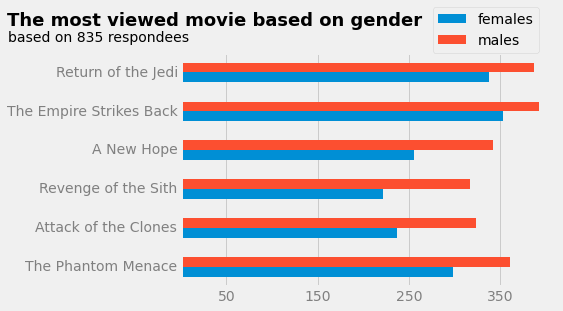

In [15]:
most_viewed = pd.DataFrame()

most_viewed['females'] = females.iloc[:, 3:9].sum()
most_viewed['males'] = males.iloc[:, 3:9].sum()

most_viewed.plot.barh()

plt.yticks([])
plt.xticks([50,150,250, 350], ['50','150','250','350'], color = 'grey')
plt.legend(['females', 'males'], loc = (0.67, 1))


plt.text(-137,4.9, color = 'grey', s = 'Return of the Jedi')
plt.text(-190,3.9, color = 'grey', s = 'The Empire Strikes Back')
plt.text(-97,2.9, color = 'grey', s = 'A New Hope')
plt.text(-155,1.9, color = 'grey', s = 'Revenge of the Sith')
plt.text(-160,0.9, color = 'grey', s = 'Attack of the Clones')
plt.text(-170,-0.1, color = 'grey', s = 'The Phantom Menace')

plt.text(-190,6.2, weight = 'bold', size = 18, s = 'The most viewed movie based on gender')
plt.text(-189,5.8, s = 'based on 835 respondees')

plt.show()

Undoubtedly, more men than women watched all episodes among the respondents, but the ranking of all films is almost the same for both genders. 

# Conclusion

`The Empire Strikes Back (Ep. 5)` is the highest rated and most watched movie among all the groups we analyzed, while `Revenge of the Sith (Ep. 3)` is the lowest rated and least watched movie among all the same groups.

In addition, the first three Star Wars movies are all rated higher by non-Star Wars and non-Star Trek fans, while the last three are all rated higher by fans of both franchises.

Finally, each Star Wars movie was seen more by males than females, with an average viewership difference of about 70. That is, there were 70 more men than women who saw each movie.